In [1]:
from engine import Node
import structure

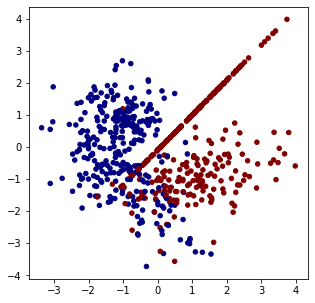

In [2]:
from sklearn.datasets import make_moons, make_blobs, make_classification, make_circles
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=600, n_features=2, n_informative=2, n_redundant=0, n_classes=2)
# X, y = make_circles(n_samples=400, noise=.05)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
y = 3*y-1
y_np = y
X_np = X
X = X.tolist()
y = y.tolist()

In [3]:
model = structure.NeuralNet([
    structure.Layer(2, 4, False),
    structure.Layer(4, 4, False),
    structure.Layer(4, 1, True),
])

In [7]:
model.gradient_descent(X, y, 100, .1)

step 0 loss 0.647203157412089
step 1 loss 0.6465651370685187
step 2 loss 0.6459387018028275
step 3 loss 0.6453119341015597
step 4 loss 0.6447002381758588
step 5 loss 0.6440954986210785
step 6 loss 0.6434943094568804
step 7 loss 0.6429090445005887
step 8 loss 0.6423350189658131
step 9 loss 0.6417642852880898
step 10 loss 0.6412018850718203
step 11 loss 0.6406487955263196
step 12 loss 0.6401071108815508
step 13 loss 0.6395677024413677
step 14 loss 0.6390364087416932
step 15 loss 0.6385137219044665
step 16 loss 0.6379967387903621
step 17 loss 0.6374906539805328
step 18 loss 0.6369869575880481
step 19 loss 0.6364919546130139
step 20 loss 0.6360052797840327
step 21 loss 0.6355246120240661
step 22 loss 0.6350496832886334
step 23 loss 0.6345836246541987
step 24 loss 0.6341198792292327
step 25 loss 0.6336667100929554
step 26 loss 0.6332251010785781
step 27 loss 0.632792085261028
step 28 loss 0.6323608466443655
step 29 loss 0.6319369709621065
step 30 loss 0.6315193558638529
step 31 loss 0.63110

In [8]:
cleanedInput = [[Node(elem) for elem in row] for row in X]
test_pred = [model(elem) for elem in cleanedInput]
print([(test_pred[i][0].data, y[i]) for i in range(100)])

for elem in test_pred:
    if elem[0].data > .5:
        elem[0].data = 2
    else:
        elem[0].data = -1
print([val[0].data for val in test_pred])
print(y)
ifs = [test_pred[i][0].data == y[i] for i in range(100)]
val=0
for i in ifs:
    if i == True:
        val += 1

print(val/100)

[(0.5524644048017077, 2), (0.5140785922934118, 2), (0.12241588043237378, -1), (0.19086723147884932, -1), (0.5447868471281712, 2), (0.02721550843088308, -1), (0.10074531591182265, -1), (0.01016837937188535, -1), (0.018460082490503855, -1), (0.1121956516822693, -1), (0.2706258314729004, -1), (0.47289726397906495, -1), (0.09908967914927755, -1), (0.5816799992478011, -1), (0.6210793092669998, -1), (0.5563794741000959, 2), (0.013294336462772055, -1), (0.5006140825727339, 2), (0.2262634977007208, 2), (0.5053833914449474, 2), (0.13479594875444623, -1), (0.17751122845727993, -1), (0.3174839062753461, 2), (0.5039676598834177, 2), (0.0753402656569456, 2), (0.057474605450254866, -1), (0.017539133409515552, -1), (0.6419803572414544, 2), (0.03517077712482735, -1), (0.5200591388287696, 2), (0.18835684014123888, -1), (0.09919794262964861, -1), (0.4608545295553351, 2), (0.019093547214146328, -1), (0.6980004510026273, 2), (0.0737523640171467, -1), (0.3074339555601914, -1), (0.6416796970924844, 2), (0.0

(-4.723087984342683, 4.976912015657282)

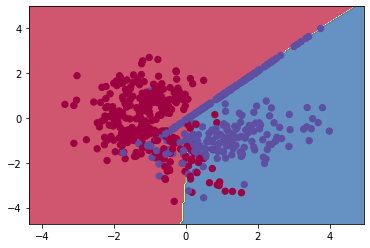

In [9]:
h = 0.05
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Node, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0.5 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())